## O nosso conjunto de dados é descrito da seguinte forma:


|Atributo                                           |   Descrição   |
|---------------------------------------------------|:-------------:|
| Trip Duration                                     |   Duração da viagem em segundos |
| Start Time                                        |   Início da viagem |
| Stop Time                                         |   Fim da Viagem   |
| Start Station ID                                  |   Identificado da estação origem   |
| Start Station Name                                |   Nome da estação onde a viagem iniciou|
| Start Station Latitude / Start Station Longitude  |   Localização onde a viagem iniciou|
| End station id                                    |   Identificado da estação destino   |
| End Station Name                                  |   Nome da estação onde a viagem terminou|
| End Station Latitude / End Station Longitude      |   Localização onde a viagem terminou   |
| Bike ID                                           |   Identificado da bicicleta  |
| User Type                                         |   Customer = passe de 24 horas ou 3 dias; Subscriber = Membro Anual |
| Birth Year                                        |   Ano de nascimento|
| Gender                                            |   0 = desconhecido; 1 = masculino; 2 = feminino |

In [1]:
# importanto as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 100)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importando o dataset

df = pd.read_parquet('/content/drive/MyDrive/Projeto UFRJ-Analytica/citibike2016-2019.parquet')

In [4]:
# realizando uma visualização inicial dos dados

df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN


# Tratamento e limpeza dos dados

#### Na visualização inicial dos dados notamos que as colunas estão duplicadas, então manteremos apenas a primeira ocorrência delas.

In [5]:
# removendo as colunas duplicadas

df = df[['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']].copy()

In [6]:
# verificando as colunas resultantes

df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


In [7]:
# removendo linhas duplicadas

df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [8]:
# verificando a quantidade de valores nulos para cada coluna

df.isna().sum()

tripduration                    1
starttime                       1
stoptime                        1
start station id              152
start station name            152
start station latitude          1
start station longitude         1
end station id                152
end station name              152
end station latitude            1
end station longitude           1
bikeid                          1
usertype                        1
birth year                 185692
gender                          1
dtype: int64

In [9]:
# removendo as linhas onde start_station_id tem valores nulos, já que são poucas

df = df.dropna(subset=['start station id'])

In [10]:
# verificando o que ainda resta de valores nulos

df.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 185691
gender                          0
dtype: int64

#### Manter nomes das variáveis com espaço não é uma boa prática. Dessa forma, renomearemos todas as colunas trocando o espaço por underscore.

In [11]:
# renomeando colunas

df = df.rename(columns={'start station id':'start_station_id',
                   'start station name':'start_station_name',
                   'start station latitude':'start_station_latitude',
                   'start station longitude': 'start_station_longitude',
                   'end station id':'end_station_id',
                   'end station name':'end_station_name',
                   'end station latitude':'end_station_latitude',
                   'end station longitude':'end_station_longitude',
                   'birth year': 'birth_year'})

In [12]:
# visualizando o dataset com as colunas modificadas

df.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


#### Podemos verificar que na coluna 'birth_year' existem alguns valores negativos, o que não faz muito sentido. Trocaremos por valores positivos.

In [13]:
# verificando os valores da coluna "birth_year"

df['birth_year']

0         -1992.0
1         -1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1978.0
3999996    1981.0
3999997    1980.0
3999998    1965.0
3999999    1981.0
Name: birth_year, Length: 3603071, dtype: float64

In [14]:
# tomando o módulo dos valores de birth_year

df ['birth_year'] = df['birth_year'].abs()
df['birth_year']

0          1992.0
1          1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1978.0
3999996    1981.0
3999997    1980.0
3999998    1965.0
3999999    1981.0
Name: birth_year, Length: 3603071, dtype: float64

####  Verificando datas;

*   convertendo o tempo de duração da viagem para minutos
*   criando nova coluna com idades
*   criando nova coluna com dias da semana

In [15]:
# passando valores das datas de float para tipo datetime

df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# alterando coluna de duração de viagem para minutos

df['tripduration'] = df['tripduration']/60.
df = df.rename(columns={'tripduration':'tripduration_min'})

#### Verificamos que o dataset possui muitos valores estranhos para duração de viagem (acima de um dia, por exemplo). Vamos retirar as linhas com viagens acima de 120 minutos, que são poucas.

In [16]:
# contando a quantidade de linhas com viagens com mais de 80 minutos

count_over_120 = len(df[df['tripduration_min'] > 120])

print(f"Quantidade de linhas com viagens com mais de 120 minutos: {count_over_120}")

Quantidade de linhas com viagens com mais de 120 minutos: 11949


In [17]:
# como são poucas linhas, removeremos as linhas com viagens com mais de 180 minutos

df = df[df['tripduration_min'] <= 120]

#### Agora vamos verificar possíveis inconsistências nos anos de nascimento e criar uma nova variável chamada "age"

In [18]:
# verificando os valores únicos para data de nascimento

unique_birth_years = df['birth_year'].unique()
print(unique_birth_years)

[1992. 1991. 1979. 1984. 1981.   nan 1990. 1980. 1966. 1972. 1976. 1956.
 1963. 1989. 1982. 1968. 1970. 1986. 1995. 1974. 1993. 1988. 1975. 1985.
 1962. 1959. 1958. 1953. 1965. 1957. 1954. 1961. 1987. 1973. 1969. 1967.
 1971. 1996. 1983. 1964. 1977. 1997. 1978. 1960. 1994. 1945. 1947. 1951.
 1900. 1941. 1955. 1948. 1998. 2000. 1938. 1950. 1952. 1901. 1949. 1946.
 1910. 1999. 1943. 1942. 1944. 1885. 1940. 1939. 1936. 1933. 1935. 1917.
 1899. 1937. 1932. 1923. 1926. 1888. 1907. 1918. 1921. 1913. 1894. 1934.
 1887. 1930. 1925. 1920. 1896. 1931. 1893. 1912. 1886. 2001. 1929. 1895.
 1927. 1915. 1916. 1928. 1884. 2002. 1924. 1889. 1909. 1890. 1919. 1922.
 1911. 2003. 1891. 1897. 1904.]


Verificamos que o dataset possui muitos valores estranhos para ano de nascimento (acima de 120 anos, por exemplo). Decidimos retirar linhas com usuários acima de 90 anos.

In [19]:
# retirando as linhas com data de nascimento anterior a 1927 (90 anos)

df = df[df['birth_year'] >= 1927]

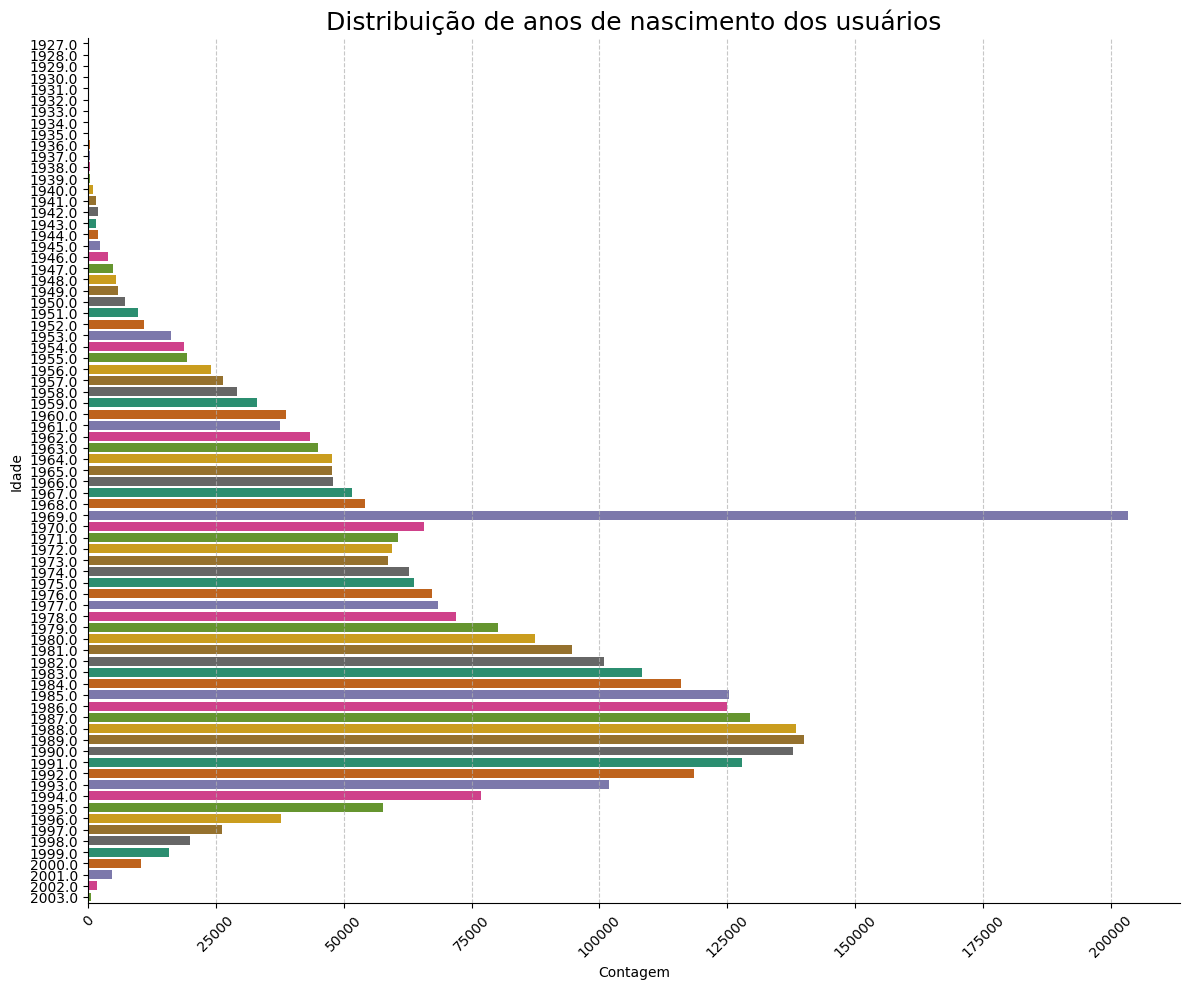

In [20]:
# verificando através de um gráfico a distribuição de anos de nascimento após o tratamento

plt.figure(figsize=(12, 10))
sns.countplot(y=df['birth_year'], palette="Dark2", linewidth=3)

plt.title("Distribuição de anos de nascimento dos usuários", fontsize=18)
plt.xlabel("Contagem")
plt.ylabel("Idade")


plt.xticks(rotation=45)
plt.subplots_adjust(left=0.15)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

É possível observar uma provável inconsistência no dataset, com muitos usuários nascidos em 1969.

In [21]:
# verificando os dados para usuários nascidos em 1969

count_1969 = len(df[df['birth_year'] == 1969])
print(f"Quantidade de linhas com birth_year igual a 1969: {count_1969}")

Quantidade de linhas com birth_year igual a 1969: 203346


In [22]:
# substituindo todos os valores 1969 por valores ausentes (NaN)

df['birth_year'] = df['birth_year'].replace(1969, pd.NA)

RecursionError: ignored

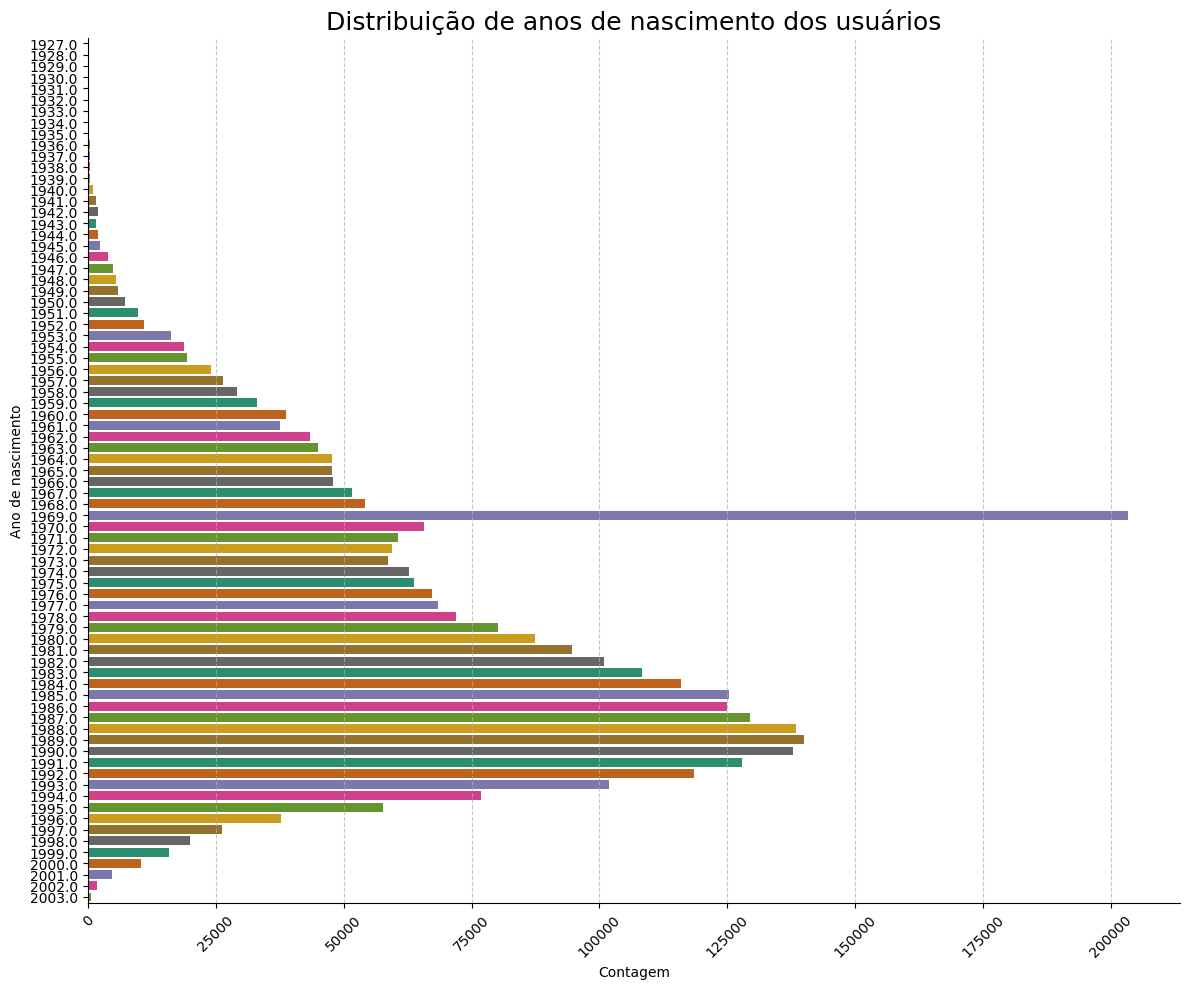

In [23]:
# vamos verificar se o gráfico de distribuição de nascimentos mudou

plt.figure(figsize=(12, 10))
sns.countplot(y=df['birth_year'].dropna().sort_values(), palette="Dark2", linewidth=3)

plt.title("Distribuição de anos de nascimento dos usuários", fontsize=18)
plt.xlabel("Contagem")
plt.ylabel("Ano de nascimento")


plt.xticks(rotation=45)
plt.subplots_adjust(left=0.15)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### Vamos verificar a distribuição de idade para encontrar possíveis inconsistências

In [24]:
# criando a coluna "age": pega o ano em que a pessoa usou a bike e subtrai do ano de nascimento

df['age'] = df['starttime'].dt.year - df['birth_year']

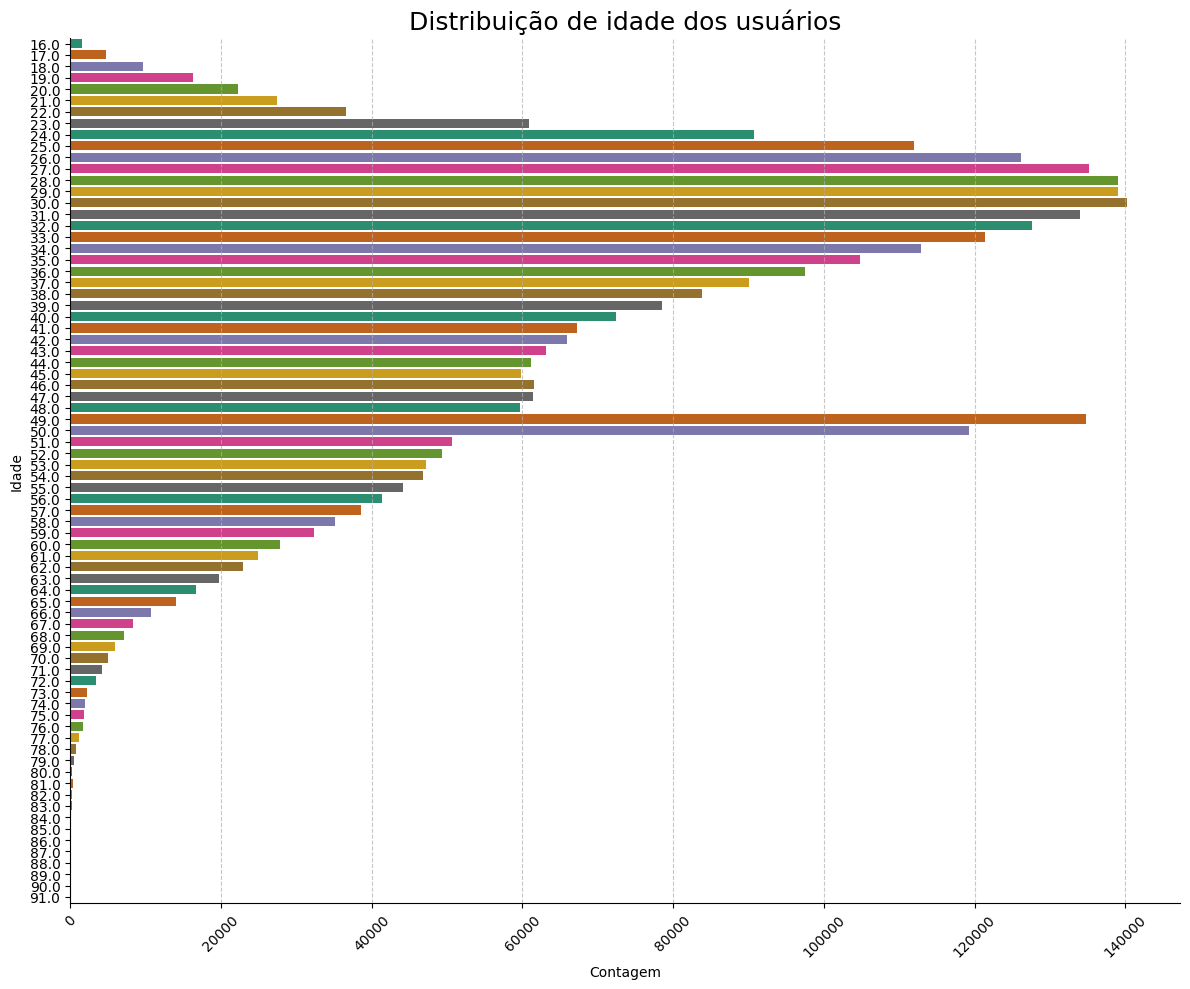

In [25]:
# vamos verificar se o gráfico de distribuição de nascimentos mudou

plt.figure(figsize=(12, 10))
sns.countplot(y=df['age'].dropna().sort_values(), palette="Dark2", linewidth=3)

plt.title("Distribuição de idade dos usuários", fontsize=18)
plt.xlabel("Contagem")
plt.ylabel("Idade")


plt.xticks(rotation=45)
plt.subplots_adjust(left=0.15)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

No gráfico acima podemos notar, de maneira preliminar, que existe uma maior quantidade de usuários com idades entre 24 e 35 anos.

#### Agora vamos criar mais algumas colunas que irão ajudar em análises futuras

In [26]:
# criando uma coluna weekday

df['weekday'] = df['starttime'].dt.day_name()

In [27]:
# criando a coluna 'weekend' indicando se a viagem ocorreu em um final de semana

# 5 e 6 representam sábado e domingo
df['weekend'] = df['starttime'].dt.dayofweek.isin([5, 6])

In [28]:
# visualizando as alterações

df.head()

,tripduration_min,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,weekday,weekend
0,4.716667,2016-03-31 09:15:31,2016-03-31 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,1992.0,1.0,24.0,Thursday,False
1,6.533333,2016-09-05 16:43:30,2016-09-05 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,1991.0,2.0,25.0,Monday,False
2,11.750000,2016-04-17 13:16:39,2016-04-17 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0,37.0,Sunday,True
3,8.916667,2016-05-02 17:59:46,2016-05-02 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0,32.0,Monday,False
4,4.766667,2016-02-06 18:27:29,2016-02-06 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0,35.0,Saturday,True


####  Algumas estações possuem coordenadas estranhas. Optamos por removê-las, visto que são poucas linhas.

In [29]:
# lista das estações que iremos remover
stations_to_remove = ["WS Don't Use", "8D Mobile 01", "8D QC Station 01", "JSQ Don't Use"]

# removendo as linhas que contenham essas estações
df = df[~df['start_station_name'].isin(stations_to_remove)]

# Análise exploratória de dados (EDA)

### Localização geográfica das Estações do Citi Bike

In [30]:
import plotly.express as px

# criando um df com as coordenadas únicas de cada estação
unique_locations = df[['start_station_name', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

# plotando o mapa usando Plotly Express com scatter_mapbox
fig = px.scatter_mapbox(
    unique_locations,
    lat='start_station_latitude',
    lon='start_station_longitude',
    text='start_station_name',
    hover_name='start_station_name',
    mapbox_style='carto-positron',
    opacity=0.7,
    color_discrete_sequence=['blue'],
    size_max=15,
)

# definindo o centro do mapa e o nível de zoom
center_lat = unique_locations['start_station_latitude'].mean()
center_lon = unique_locations['start_station_longitude'].mean()
zoom_level = 10

# atualizando layout do mapa
fig.update_layout(
    title="Distribuição geográfica das Estações",
    title_x=0.5,
    title_font_size=24,
    mapbox={
        'center': {'lat': center_lat, 'lon': center_lon},
        'zoom': 11,
    },
    margin={"r":0,"t":60,"l":0,"b":0},
    showlegend=False,
)
# definindo largura e altura do mapa
fig.update_layout(width=800, height=700)

# exibindo o mapa
fig.show()


## Estações mais populares e possíveis relações

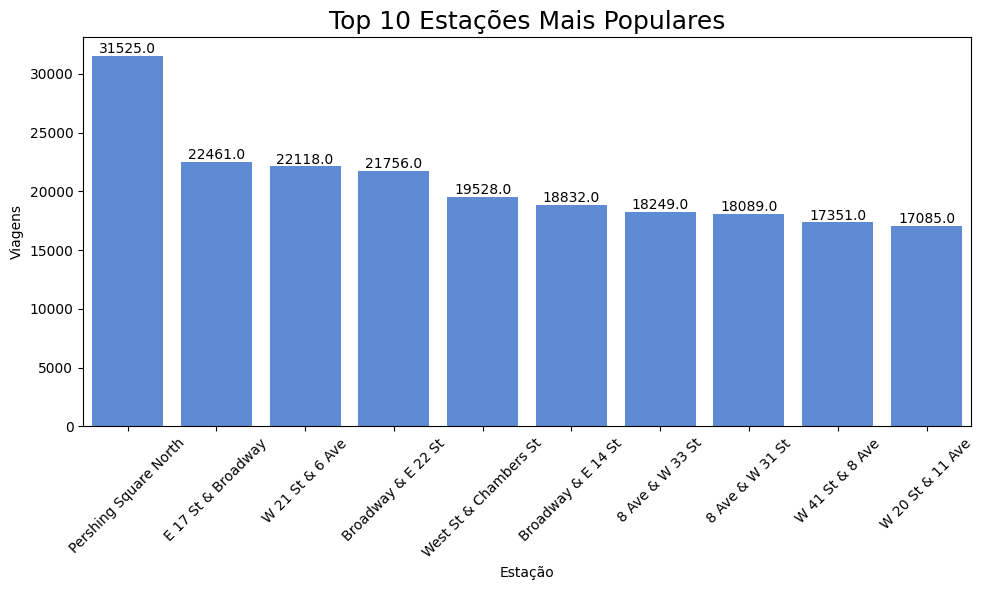

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# contagem das estações mais populares
popular_stations = df['start_station_name'].value_counts().head(10)

# estilo
current_palette = [(0.2901960784313726, 0.5254901960784314, 0.9098039215686274)] * len(popular_stations)

# plotando um gráfico de barras para as estações mais populares
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=popular_stations.index, y=popular_stations.values, palette=current_palette)

# adicionando valores totais como dicas de ferramentas (tooltips)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Top 10 Estações Mais Populares', fontdict={'fontsize': 18})
plt.xlabel('Estação')
plt.ylabel('Viagens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Com o gráfico de barras acima podemos ver que a estação mais popular fica em Pershing Square North. Talvez seja uma área bem movimentada por haver muitos comerciais, estações de metros, parques, etc.

In [32]:
# calculando o volume de viagens por estação
station_trip_volume = df['start_station_name'].value_counts()

# criando um df com as informações das estações únicas e suas coordenadas
unique_locations = df[['start_station_name', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

# criando um df com as informações das estações e seus volumes de viagens
station_data = pd.DataFrame({
    'start_station_name': station_trip_volume.index,
    'trip_volume': station_trip_volume.values
})

# merge entre os dfs
unique_locations = unique_locations.merge(station_data, on='start_station_name')

# plotandi o mapa usando Plotly Express com scatter_mapbox
fig = px.scatter_mapbox(
    unique_locations,
    lat='start_station_latitude',
    lon='start_station_longitude',
    text='start_station_name',
    hover_name='start_station_name',
    size='trip_volume',  # tamanho proporcional ao volume de viagens
    size_max=50,  # tamanho máximo do ponto
    color='trip_volume',  # escala de cores de acordo com o volume de viagens
    color_continuous_scale='RdBu_r',  # esquema de cores
    mapbox_style='carto-positron',  # estilo do mapa
)

# definindo o centro do mapa e o nível de zoom
center_lat = unique_locations['start_station_latitude'].mean()
center_lon = unique_locations['start_station_longitude'].mean()
zoom_level = 10

fig.update_layout(
    mapbox={
        'center': {'lat': center_lat, 'lon': center_lon},
        'zoom': zoom_level
    }
)

# ajusantado as margens internas para remover as bordas brancas
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# exibindo o mapa
fig.show()

Podemos ver com o mapa acima a distribuição das estações onde, o tamanho da bola e a escala de cor nos indica a popularidade das estações.

### Relações entre as estações mais populares

In [33]:
# nomes das estações mais populares
popular_stations = ['Pershing Square North', 'E 17 St & Broadway', 'W 21 St & 6 Ave', 'Broadway & E 22 St', 'West St & Chambers St', 'Broadway & E 14 St', '8 Ave & W 33 St', '8 Ave & W 31 St', '12 Ave & W 40 St', 'W 20 St & 11 Ave']

# filtrando o DataFrame para incluir apenas as estações mais populares
filtered_df = df[df['start_station_name'].isin(popular_stations)]

<ipython-input-34-1a28446e0cb5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



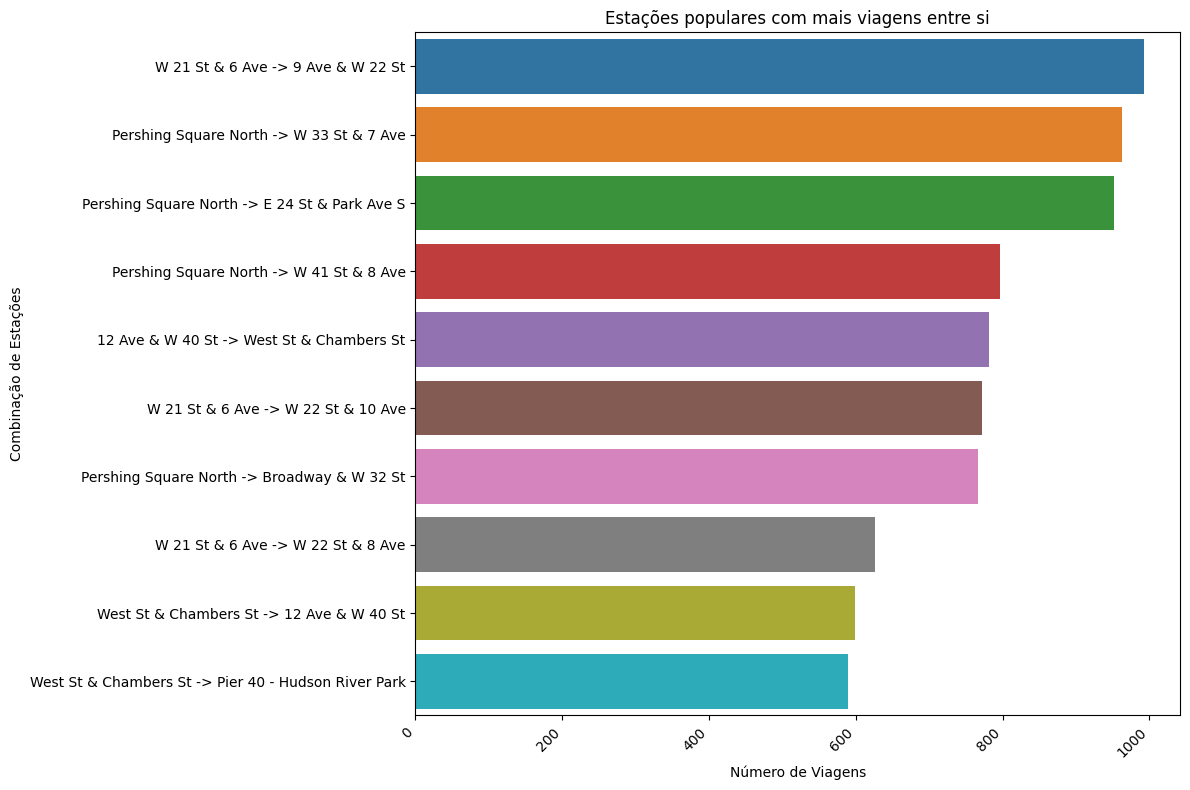

In [34]:
# criando uma coluna para representar as combinações de estações de origem e destino
filtered_df['station_combination'] = filtered_df['start_station_name'] + ' -> ' + filtered_df['end_station_name']

# calculando o número de viagens para cada combinação de estações
station_combination_counts = filtered_df['station_combination'].value_counts().reset_index()
station_combination_counts.columns = ['Combinação de Estações', 'Número de Viagens']

# ordenando as combinações de estações pelo número de viagens
station_combination_counts = station_combination_counts.sort_values(by='Número de Viagens', ascending=False)

# plotando um gráfico de barras para mostrar as combinações de estações com mais viagens
plt.figure(figsize=(12, 8))
sns.barplot(data=station_combination_counts.head(10), x='Número de Viagens', y='Combinação de Estações')
plt.title('Estações populares com mais viagens entre si')
plt.xlabel('Número de Viagens')
plt.ylabel('Combinação de Estações')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

O gráfico acima nos mostra dentre as estações mais populares, qual rota entre elas é a mais popular. Verificamos que esta corresponde à rota que vai de  W 21 St & 6 Ave para W 22 St & 9 Ave.

## Distribuição do uso de bicicletas ao longo da semana

In [35]:
uso_semanal = df.groupby('weekday').size()    # Agrupa os dados nos dias da semana e nos da a frequencia de ocorrencia por dia
uso_semanal = uso_semanal.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])   # organiza os dados

uso_semanal

weekday
Monday       485934
Tuesday      531575
Wednesday    546985
Thursday     534868
Friday       512503
Saturday     418847
Sunday       376378
dtype: int64

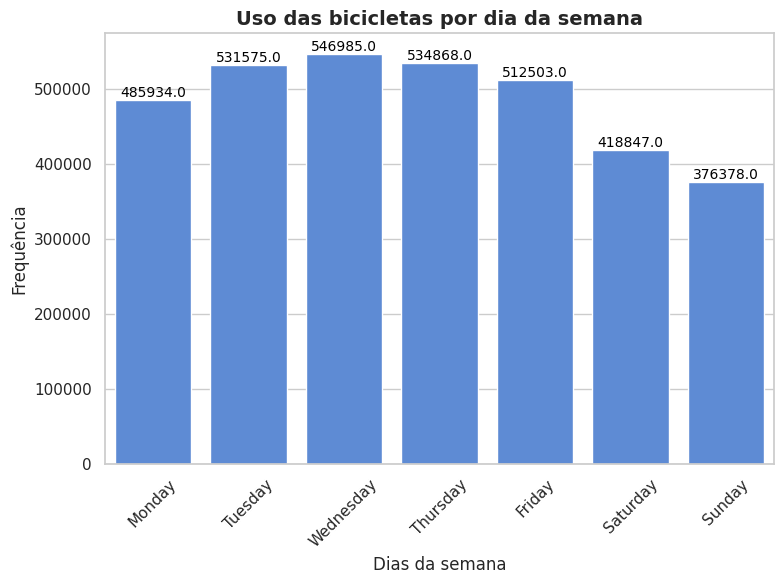

In [36]:
sns.set_theme(style="whitegrid")
current_palette = [(0.2901960784313726, 0.5254901960784314, 0.9098039215686274)] * len(uso_semanal)

# criando o gráfico de barras e verificando dia com maior frequência
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=uso_semanal.index, y=uso_semanal.values, palette=current_palette)

# adicionando valores
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Dias da semana', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Uso das bicicletas por dia da semana', weight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos ver que o uso das bicicletas cresce no inicio da semana, tendo uma maior utilização das bicicletas na quarta-feira e decresce ao longo do resto da semana. Isso pode ser interpretado pensando que as pessoas estão utilizando as bicicletas para se deslocar até o trabalho ou em tarefas que necessitam de viagens de curtas distancias.

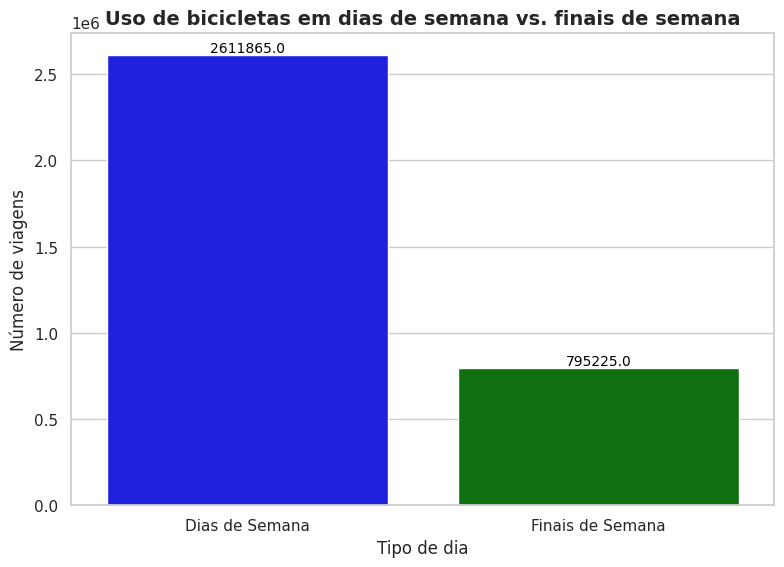

In [37]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
current_palette = ['blue', 'green']

# contando o número de viagens em dias de semana e finais de semana
usage_by_weekend = df.groupby('weekend')['weekend'].count()

# plotando o gráfico de barras
ax = sns.barplot(x=usage_by_weekend.index, y=usage_by_weekend.values, palette=current_palette)

# adicionando valores
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Uso de bicicletas em dias de semana vs. finais de semana', fontsize=14, weight='bold')
plt.xlabel('Tipo de dia', fontsize=12)
plt.ylabel('Número de viagens', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Dias de Semana', 'Finais de Semana'], rotation=0)
plt.tight_layout()
plt.show()


Podemos ver que aos fins de semana temos uma baixa utilização das bicicletas comparado aos dias de semana. Uma forma de aproveitar essa informação, seria se houver uma necessidade de manutenção das bicicletas, uma opção para fazer isso seria nos finais de semana onde temos uma baixa utilização.

## Existe variação por estação?

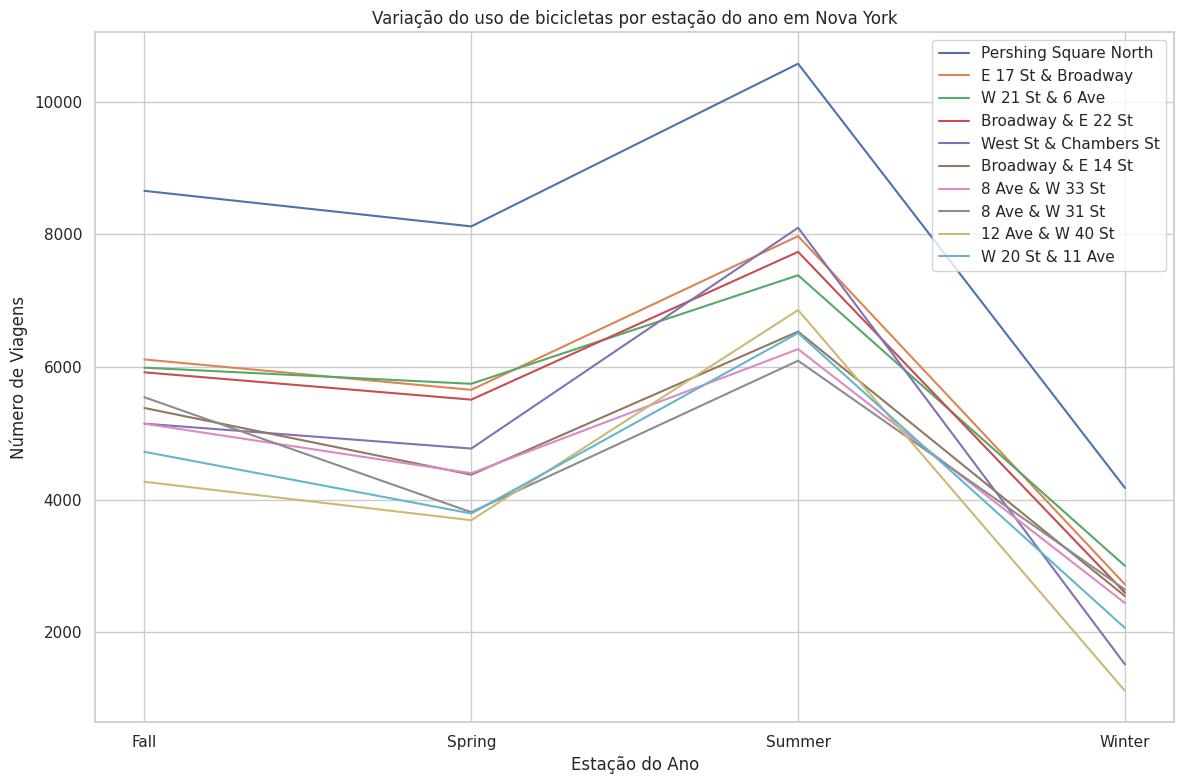

In [38]:
# criando colunas de mês e ano
df['month'] = df['starttime'].dt.month
df['year'] = df['starttime'].dt.year

# definindo os intervalos de meses para cada estação do ano
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]
winter_months = [12, 1, 2]

# função para mapear o mês para a estação do ano
def map_season(month):
    if month in spring_months:
        return 'Spring'
    elif month in summer_months:
        return 'Summer'
    elif month in fall_months:
        return 'Fall'
    else:
        return 'Winter'

# aplicando a função para criar a coluna 'season'
df['season'] = df['month'].apply(map_season)

# filtrando apenas as estações populares
df_popular = df[df['start_station_name'].isin(popular_stations)]

# agrupando e contando de viagens por estação do ano e estação
station_season_counts = df_popular.groupby(['season', 'start_station_name']).size().reset_index(name='Number of Trips')

# criando um gráfico de linha para cada estação
plt.figure(figsize=(12, 8))

for station in popular_stations:
    station_data = station_season_counts[station_season_counts['start_station_name'] == station]
    plt.plot(station_data['season'], station_data['Number of Trips'], label=station)

plt.title('Variação do uso de bicicletas por estação do ano em Nova York')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Viagens')
plt.legend()
plt.tight_layout()
plt.show()

Primeiramente podemos observar que existe um certo padrão entre essas estações de bicicletas mais populares. Todas elas apresentam uma queda entre Outono e Primavera, um alto crescimento entre Primavera e Verão e uma grande queda entre Verão e Inverno.


*   A queda durante o Outono pode se dar pelo fato de termos uma temperatura mais baixa e algumas ocorrências de dias chuvosos.
*   O crescimento entre Primavera e Verão pode ser devido ao clima mais agradável para se utilizar a bicicleta, como dias mais ensolarados. E também podem haver períodos de férias entre essas estações do ano, o que contribui para o aumento no uso das bicicletas.
*   Por estar se aproximando do fim de ano e datas mais importantes, e ser uma transição para climas mais frios, podemos observar uma queda bastante ascentuada entre o Verão e Inverno.





## Rotas mais Populares (Origem - Destino) e seus Destaques:

In [39]:
# criando nova coluna das rotas baseadas nos ID's das estações

df['Routes'] = df['start_station_name'] + ' - \n ' + df['end_station_name']

popular_routes = df.groupby('Routes').size().reset_index(name='Frequency')   # agrupa dados por rotas e cria coluna com frequencias

popular_routes = popular_routes.sort_values(by='Frequency', ascending=False)    # organizando valores de maneira Decrescente

In [40]:
# visualizando as rotas mais populares

popular_routes

,Routes,Frequency
67067,Central Park S & 6 Ave - \n Central Park S & 6...,1032
241929,W 21 St & 6 Ave - \n 9 Ave & W 22 St,992
201866,Pershing Square North - \n W 33 St & 7 Ave,962
126744,E 7 St & Avenue A - \n Cooper Square & Astor Pl,960
201526,Pershing Square North - \n E 24 St & Park Ave S,952
...,...,...
146740,Fulton St & Grand Ave - \n Broad St & Bridge St,1
146729,Fulton St & Grand Ave - \n Bedford Ave & Nassa...,1
146727,Fulton St & Grand Ave - \n Bayard St & Leonard St,1
146726,Fulton St & Grand Ave - \n Barrow St & Hudson St,1


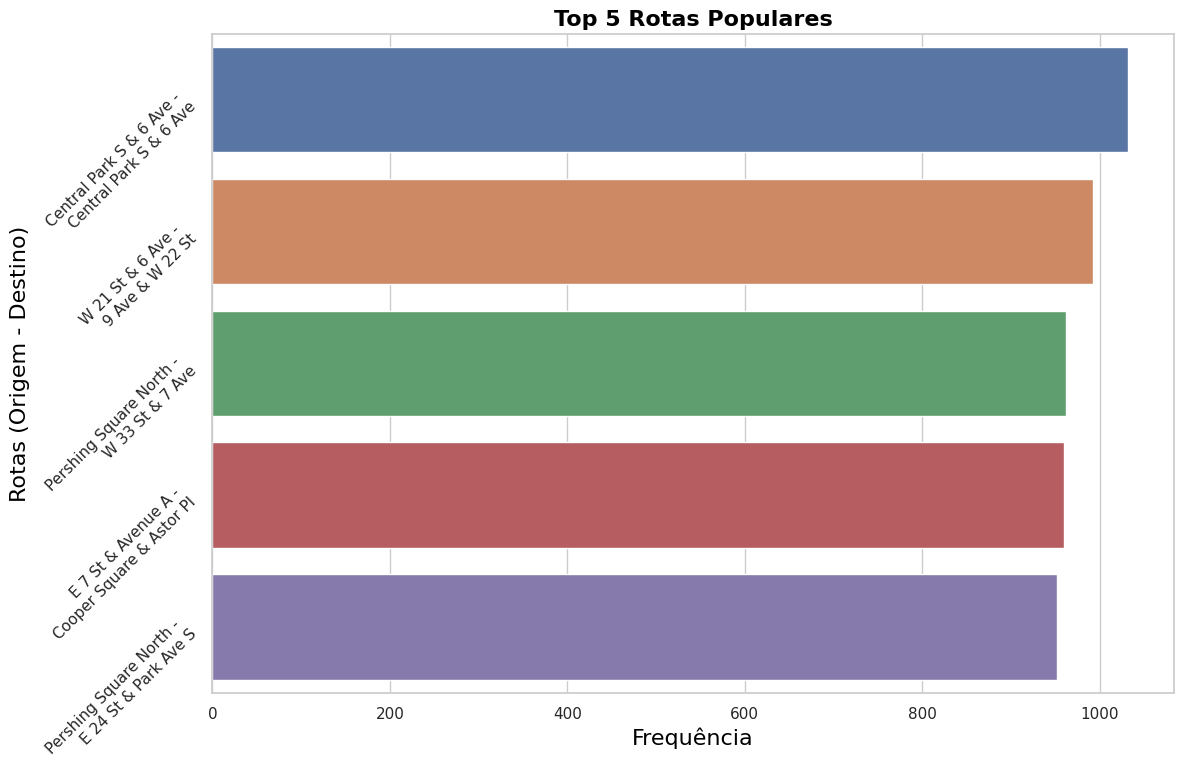

In [41]:
# selecionando as 5 rotas mais populares

top_5 = popular_routes.head(5)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# Criar um gráfico de barras usando Seaborn
plt.figure(figsize=(12,8))
sns.barplot(data=top_5, x='Frequency', y='Routes')
plt.xlabel('Frequência', fontdict=font)
plt.ylabel('Rotas (Origem - Destino)',  fontdict=font)
plt.title('Top 5 Rotas Populares', weight='bold', fontdict=font)
plt.yticks(rotation=45)


plt.tight_layout()
plt.show()

Pelo gráfico acima podemos ver que a rota mais popular é iniciada na estação de Central Park S & 6 Ave e tem como origem a mesma estação. Vasculhando os dados, observamos que apesar de ter a mesma origem e destino, os ID's das bicicletas eram diferentes. Isso pode ser um indicativo de que as pessoas poderiam estar utilizando as bicicletas como um lazer, passeando pela região e devolvendo as bicicletas no mesmo local.

## Verificando a proporção por gênero

In [42]:
# podemos ver quantos são homens(1), mulheres(2) e desconhecidos(0)

df['gender'].value_counts()

1.0    2418680
2.0     825750
0.0     162660
Name: gender, dtype: int64

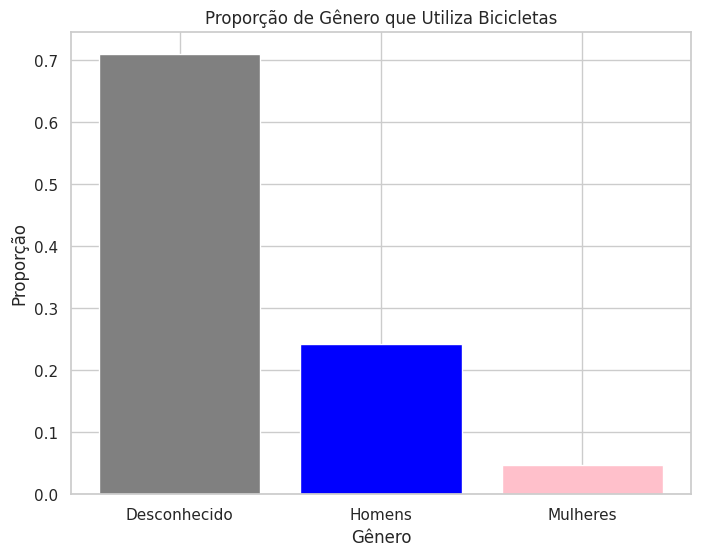

In [43]:
# agrupando os dados por gênero e contar o número de ocorrências
gender_counts = df['gender'].value_counts()

# calculando a proporção de cada gênero em relação ao total
total_users = gender_counts.sum()
gender_proportions = gender_counts / total_users

# criando um gráfico de barras para mostrar as proporções
labels = ['Desconhecido', 'Homens', 'Mulheres']
colors = ['gray', 'blue', 'pink']

plt.figure(figsize=(8, 6))
plt.bar(labels, gender_proportions, color=colors)
plt.title('Proporção de Gênero que Utiliza Bicicletas')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.show()


## Distribuição por horários

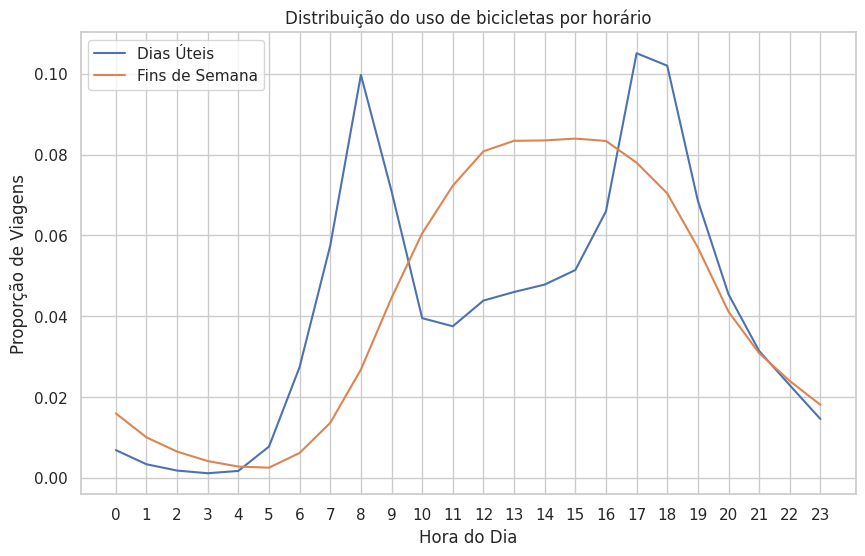

In [44]:
# extraindo a hora de início da viagem
df['start_hour'] = df['starttime'].dt.hour

# calculando a distribuição das viagens ao longo das horas do dia em dias úteis (weekday) e fins de semana (weekend)
hourly_distribution_weekday = df[df['weekend'] == False]['start_hour'].value_counts(normalize=True).sort_index()
hourly_distribution_weekend = df[df['weekend'] == True]['start_hour'].value_counts(normalize=True).sort_index()

# criando um gráfico de linha para mostrar a distribuição ao longo das horas
plt.figure(figsize=(10, 6))
plt.plot(hourly_distribution_weekday.index, hourly_distribution_weekday.values, label='Dias Úteis')
plt.plot(hourly_distribution_weekend.index, hourly_distribution_weekend.values, label='Fins de Semana')
plt.title('Distribuição do uso de bicicletas por horário')
plt.xlabel('Hora do Dia')
plt.ylabel('Proporção de Viagens')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


* Através do gráfico podemos ver que nos dias úteis temos uma maior utilização das bicicletas no período entre 7 e 9 horas da manhã, que é quando normalmente as pessoas estão indo trabalhar ou para outros compromissos, e também entre às 17 e 18 horas da tarde, quando geralmente retornam para casa.
* Vemos que nos finais de semana temos que o uso das bicicletas esta mais distribuida ao longo do dia, talvez por serem utilizadas mais para o lazer ou coisas do tipo.

## Duração média das viagens por classes

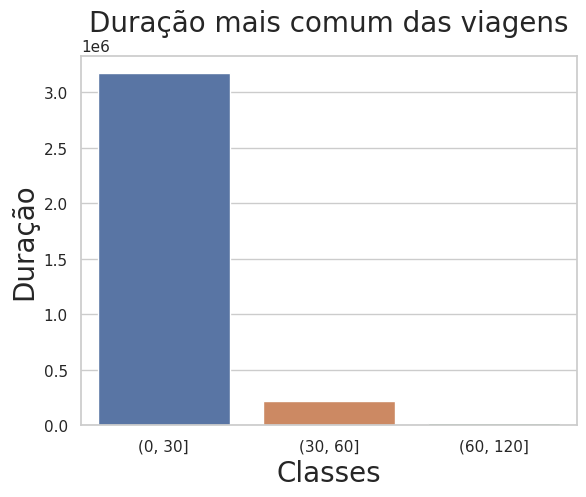

In [45]:
# verificando a duração média das viagens

df['tripduration_bins'] = pd.cut(df['tripduration_min'], [0, 30, 60, 120])

sns.barplot(x='tripduration_bins', y='tripduration_min', data=df, estimator=np.size)
plt.title('Duração mais comum das viagens', fontsize=20)
plt.xlabel('Classes', fontsize=20)
plt.ylabel('Duração', fontsize=20)
plt.show()


lembrar de padronizar os gráficos

## Perfil de assinatura do serviço

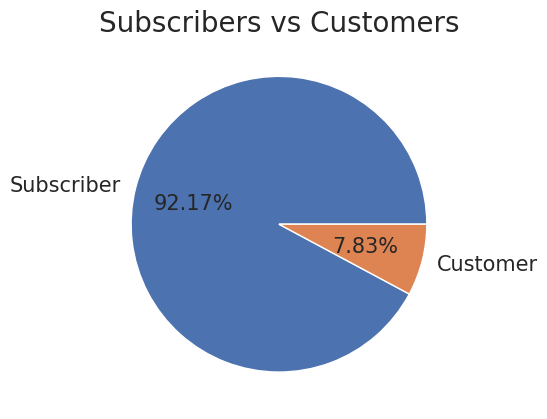

In [46]:
# verificando se o serviço é mais utilizado por assinantes de longo prazo ou curto prazo

user_type_count = df['usertype'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%', textprops={'fontsize': 15} )
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

traduzir

## Distribuição do uso por idade e gênero

<Axes: xlabel='count', ylabel='age'>

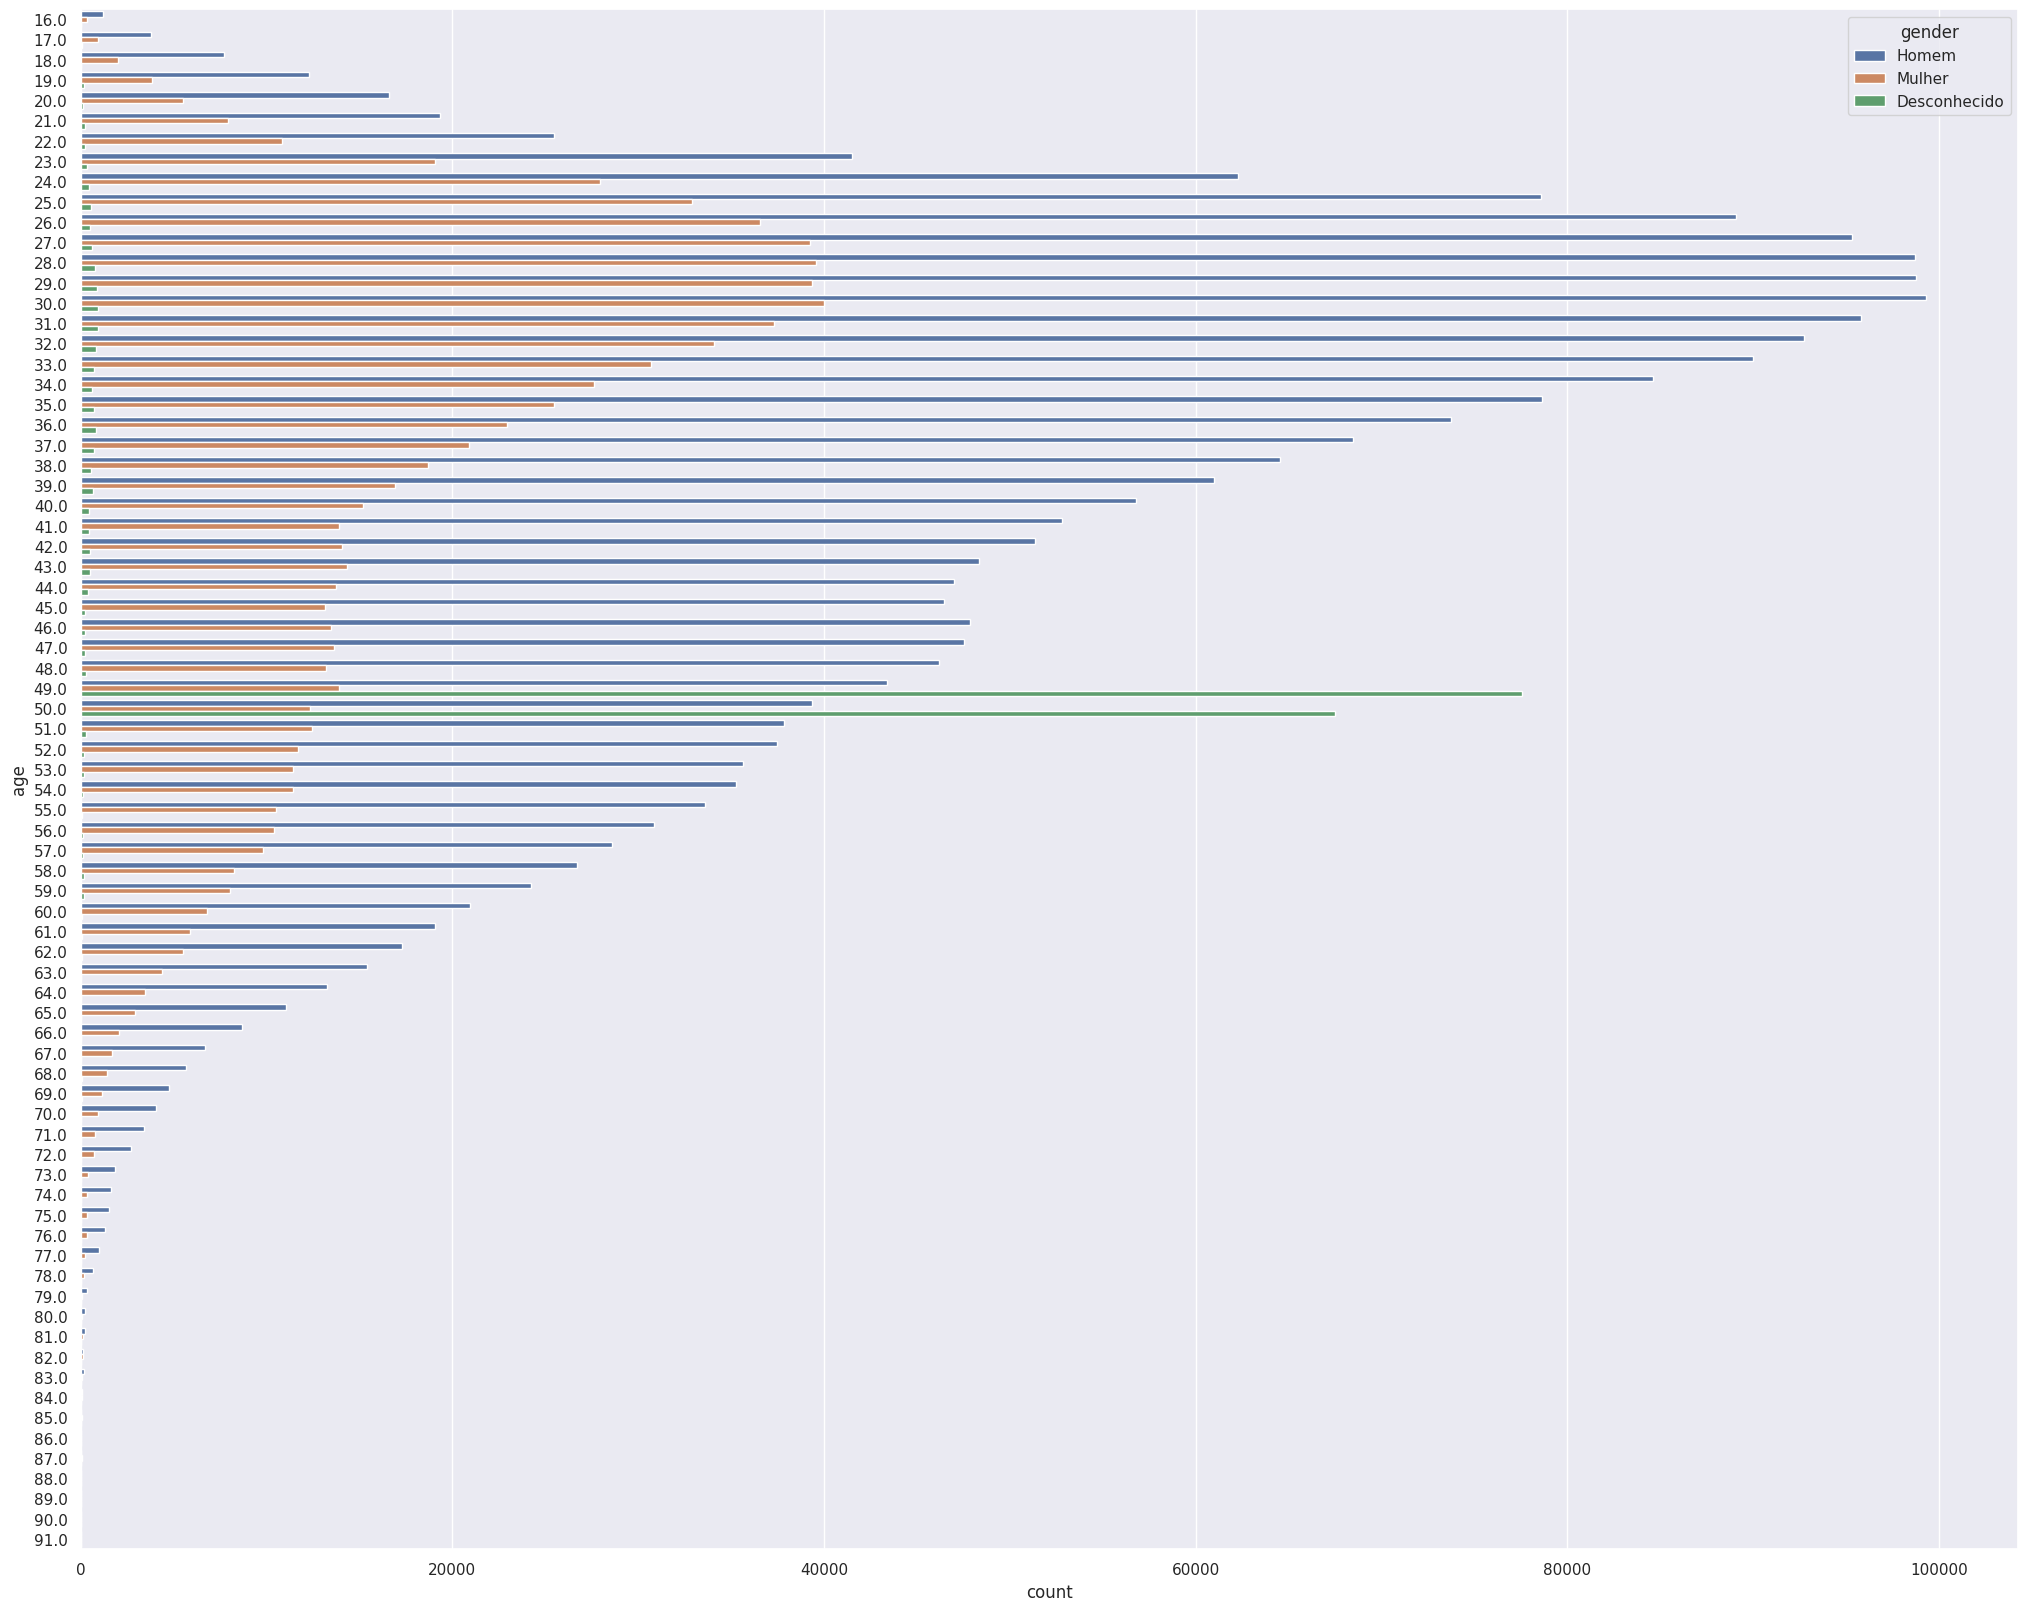

In [47]:
# verificando qual o perfil de idade e uso de cada gênero

gender_mapping = {0: 'Desconhecido', 1: 'Homem', 2: 'Mulher'}
df['gender'] = df['gender'].map(gender_mapping)
sns.set(rc={"figure.figsize":(25,20)})
sns.countplot(data=df, y = df['age'], hue='gender', dodge=True)

In [48]:
import math

# Definindo limite de distância em quilômetros para ser classificado como corrida pareada
limite_distancia_km = 1

# Função para calcular a distância entre duas coordenadas de latitude e longitude
def calcular_distancia(lat1, lon1, lat2, lon2):
    # Raio da Terra em km
    raio_terra_km = 6371.0

    # Conversão de graus para radianos
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Diferenças de latitude e longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine para calcular a distância
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distancia = raio_terra_km * c

    return distancia

# Calcule a distância para cada viagem
df['distancia_km'] = df.apply(lambda row: calcular_distancia(
    row['start_station_latitude'], row['start_station_longitude'],
    row['end_station_latitude'], row['end_station_longitude']), axis=1)

# Filtrando as viagens pareadas com base no limite de distância
viagens_pareadas = df[df['distancia_km'] < limite_distancia_km]

# Contagem de frequência das estações de partida e chegada para viagens pareadas
estacoes_pareadas = viagens_pareadas.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

# Ordene as contagens em ordem decrescente para identificar as mais frequentes
estacoes_pareadas = estacoes_pareadas.sort_values(by='count', ascending=False)

# As estações e rotas mais frequentemente utilizadas para corridas pareadas
print(estacoes_pareadas.head())


           start_station_name          end_station_name  count
6803   Central Park S & 6 Ave    Central Park S & 6 Ave   1032
23912         W 21 St & 6 Ave           9 Ave & W 22 St    992
12712       E 7 St & Avenue A  Cooper Square & Astor Pl    960
20962      S 4 St & Wythe Ave      N 6 St & Bedford Ave    900
19195    N 6 St & Bedford Ave        S 4 St & Wythe Ave    831


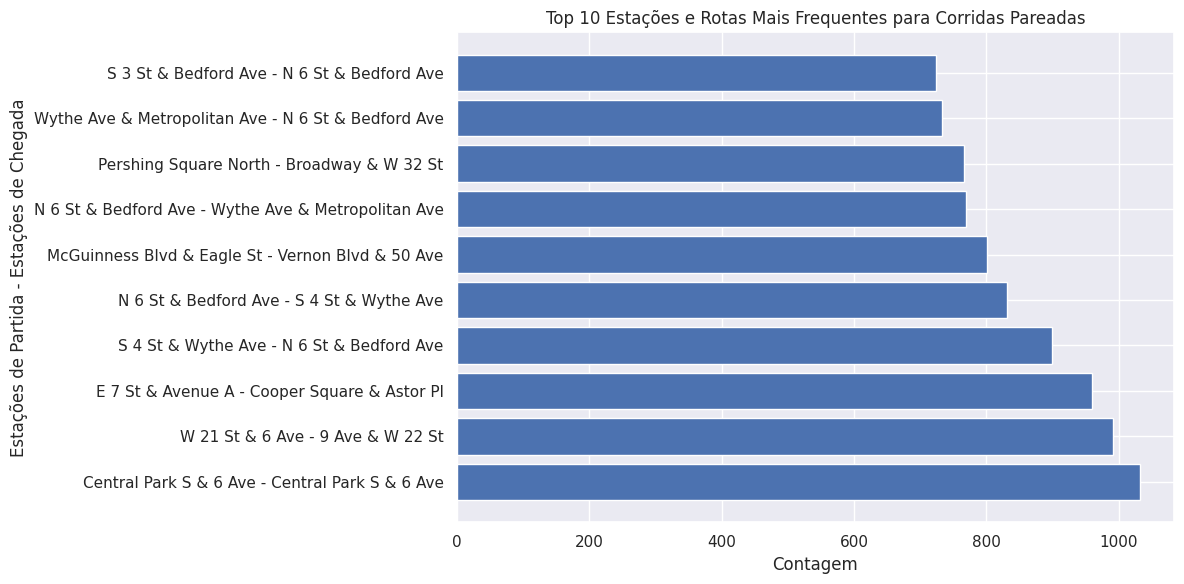

In [49]:

# Selecione as 10 estações de partida e chegada mais frequentes
top_10_estacoes_pareadas = estacoes_pareadas.head(10)

# Visualização em um gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_10_estacoes_pareadas['start_station_name'] + ' - ' + top_10_estacoes_pareadas['end_station_name'], top_10_estacoes_pareadas['count'])
plt.xlabel('Contagem')
plt.ylabel('Estações de Partida - Estações de Chegada')
plt.title('Top 10 Estações e Rotas Mais Frequentes para Corridas Pareadas')
plt.tight_layout()
plt.show()
